In [1]:
import numpy as np
import pickle
import tensorflow as tf
from tensorflow.python.keras.backend import learning_phase
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



In [6]:
num_classes = 8

model = tf.keras.models.Sequential([
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(128,128, 3)),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

def classification(x_train,y_train,model,path="output"):
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
    
    model.fit(x_train, y_train, epochs=10, validation_split=0.1)
    model.save(path+'/model')

def loadData(path="../output"):
    '''
    Loads the data to be used by the classifiers
    '''
    pickle_in = open(path+"/X.pickle", "rb")
    X = pickle.load(pickle_in)
    pickle_in = open(path+"/y.pickle", "rb")
    y = pickle.load(pickle_in)
    pickle_in = open(path+"/data.pickle", "rb")
    data = pickle.load(pickle_in)

    return X,y,data

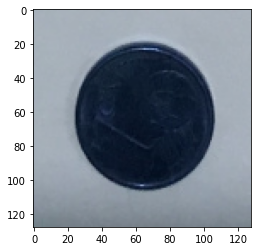

Training Size: 1032
Testing  Size: 259


In [7]:
X,y,_ = loadData()
plt.imshow(X[3])
plt.show()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print('Training Size:', len(X_train))
print('Testing  Size:', len(X_test))

In [8]:
classification(np.asarray(X_train),np.asarray(y_train),model)

Epoch 1/10
29/29 [==============================] - 14s 448ms/step - loss: 1.8365 - accuracy: 0.2716 - val_loss: 1.4306 - val_accuracy: 0.3942
Epoch 2/10
29/29 [==============================] - 15s 516ms/step - loss: 1.3103 - accuracy: 0.5108 - val_loss: 0.9786 - val_accuracy: 0.6346
Epoch 3/10
29/29 [==============================] - 15s 522ms/step - loss: 0.7329 - accuracy: 0.7500 - val_loss: 0.9198 - val_accuracy: 0.6442
Epoch 4/10
29/29 [==============================] - 13s 460ms/step - loss: 0.5669 - accuracy: 0.8039 - val_loss: 0.5325 - val_accuracy: 0.8365
Epoch 5/10
29/29 [==============================] - 13s 454ms/step - loss: 0.3517 - accuracy: 0.8858 - val_loss: 0.3943 - val_accuracy: 0.8654
Epoch 6/10
29/29 [==============================] - 13s 451ms/step - loss: 0.3754 - accuracy: 0.8610 - val_loss: 0.3742 - val_accuracy: 0.8846
Epoch 7/10
29/29 [==============================] - 15s 512ms/step - loss: 0.3017 - accuracy: 0.9030 - val_loss: 0.4055 - val_accuracy: 0.8462

In [9]:
results = model.evaluate(np.asarray(X_test),np.asarray(y_test))
print(results)

9/9 [==============================] - 1s 133ms/step - loss: 0.6146 - accuracy: 0.7799
[0.6145877242088318, 0.7799227833747864]
